There are 25 variables:

ID: ID of each client <br>
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
SEX: Gender (1=male, 2=female) <br>
EDUCATION: (1 = graduate school; 2 = university; 3 = high school; 0, 4, 5, 6 = others) <br>
MARRIAGE: Marital status  (1 = married; 2 = single; 3 = divorce; 0=others) <br>
AGE: Age in years <br>
PAY_0: Repayment status in September, 2005 (-2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.) <br>
-2 = Balance paid in full and no transactions this period (we may refer to this credit card account as having been 'inactive' this period) <br>
0 = Customer paid the minimum due amount, but not the entire balance. I.e., the customer paid enough for their account to remain in good standing, but did revolve a balance
PAY_2: Repayment status in August, 2005 (scale same as above) <br>
PAY_3: Repayment status in July, 2005 (scale same as above) <br>
PAY_4: Repayment status in June, 2005 (scale same as above) <br>
PAY_5: Repayment status in May, 2005 (scale same as above) <br>
PAY_6: Repayment status in April, 2005 (scale same as above) <br>
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar) <br>
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar) <br>
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar) <br>
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar) <br>
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar) <br>
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) <br>
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar) <br>
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar) <br>
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar) <br>
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar) <br>
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar) <br>
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar) <br>
default.payment.next.month: Default payment (1= default, 0=not default) <br>

### 1. Load Data

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [117]:
default_file_path = '../data/UCI_Credit_Card.csv'

In [118]:
#create dataframe
df = pd.read_csv(default_file_path,sep=',')

### Some data preparation

In [119]:
#drop column because we don't use it to analyze
df = df.drop(columns=['ID'])

In [120]:
#rename column
df.rename(columns = {'default.payment.next.month':'isDefaulter', }, inplace = True) 

In [121]:
#show some data in datframe
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [122]:
#to see that is there any missing data
df.isna().sum()

LIMIT_BAL      0
SEX            0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
isDefaulter    0
dtype: int64

In [123]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [124]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [125]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


-> Can Negative values be interpreted as credit? Need to investigate furthur

In [126]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### 2. Data cleaning

-> For the "EDUCATION" feature, category 5 and 6 are unlabelled and category 0 is undocumented
-> Similarly, the "MARRIAGE" feature includes an undocumented label 0

In [127]:
# add EDUCATION is 4,5,6 as 0 which mean others
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 4)
df.loc[fil, 'EDUCATION'] = 0
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

In [128]:
# 0 = male, 1 = female
df["SEX"] = df["SEX"].replace([1,2], [0,1])

In [129]:
# 0,0,0 = 0, 1,0,0 = 1, 0,1,0 = 2, 0,0,1 = 3
df  = pd.get_dummies(df,  columns=['EDUCATION'], drop_first=True)

In [130]:
# 0,0,0 = 0, 1,0,0 = 1, 0,1,0 = 2, 0,0,1 = 3
df  = pd.get_dummies(df,  columns=['MARRIAGE'], drop_first=True)

In [131]:
#df  = pd.get_dummies(df,  columns=['PAY_0'], drop_first=True)

In [132]:
#df  = pd.get_dummies(df,  columns=['PAY_2 '], drop_first=True)

In [133]:
#df  = pd.get_dummies(df,  columns=['PAY_3 '], drop_first=True)

In [134]:
#df  = pd.get_dummies(df,  columns=['PAY_4 '], drop_first=True)

In [135]:
#df  = pd.get_dummies(df,  columns=['PAY_5 '], drop_first=True)

In [136]:
#df  = pd.get_dummies(df,  columns=['PAY_6'], drop_first=True)

In [137]:
df

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,0,1,0,1,0,0
1,120000.0,1,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,0,1,0,0,1,0
2,90000.0,1,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,0,1,0,0,1,0
3,50000.0,1,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,0,1,0,1,0,0
4,50000.0,0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,39,0,0,0,0,0,0,188948.0,...,3047.0,5000.0,1000.0,0,0,0,1,1,0,0
29996,150000.0,0,43,-1,-1,-1,-1,0,0,1683.0,...,129.0,0.0,0.0,0,0,0,1,0,1,0
29997,30000.0,0,37,4,3,2,-1,0,0,3565.0,...,4200.0,2000.0,3100.0,1,0,1,0,0,1,0
29998,80000.0,0,41,1,-1,0,0,0,-1,-1645.0,...,1926.0,52964.0,1804.0,1,0,0,1,1,0,0


The "PAY_n" variables show how many months a payment is late. A value of "-1" meaning the payment was made on time according to the document. However, the meaning of "-2" and "0" is not clear. To make things clearer, it would be a good idea to consider "on-time payment" as 0

In [138]:
# df.to_csv('data/UCI_Credit_Card_new.csv', index=False, encoding='utf-8', header=True)

In [139]:

# def replace_to_zero(col):
#     fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
#     df.loc[fil, col] = 0

# for i in ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
#     replace_to_zero(i)

### 3. Exploratory Data Analysis

In [140]:
df

,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,1,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,0,1,0,1,0,0
1,120000.0,1,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,0,1,0,0,1,0
2,90000.0,1,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,0,1,0,0,1,0
3,50000.0,1,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,0,1,0,1,0,0
4,50000.0,0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,39,0,0,0,0,0,0,188948.0,...,3047.0,5000.0,1000.0,0,0,0,1,1,0,0
29996,150000.0,0,43,-1,-1,-1,-1,0,0,1683.0,...,129.0,0.0,0.0,0,0,0,1,0,1,0
29997,30000.0,0,37,4,3,2,-1,0,0,3565.0,...,4200.0,2000.0,3100.0,1,0,1,0,0,1,0
29998,80000.0,0,41,1,-1,0,0,0,-1,-1645.0,...,1926.0,52964.0,1804.0,1,0,0,1,1,0,0


In [141]:
#see type of each column
df.dtypes

LIMIT_BAL      float64
SEX              int64
AGE              int64
PAY_0            int64
PAY_2            int64
PAY_3            int64
PAY_4            int64
PAY_5            int64
PAY_6            int64
BILL_AMT1      float64
BILL_AMT2      float64
BILL_AMT3      float64
BILL_AMT4      float64
BILL_AMT5      float64
BILL_AMT6      float64
PAY_AMT1       float64
PAY_AMT2       float64
PAY_AMT3       float64
PAY_AMT4       float64
PAY_AMT5       float64
PAY_AMT6       float64
isDefaulter      int64
EDUCATION_1      uint8
EDUCATION_2      uint8
EDUCATION_3      uint8
MARRIAGE_1       uint8
MARRIAGE_2       uint8
MARRIAGE_3       uint8
dtype: object

-> No null values and datatypes are also correct
-> There are 30000 records in the dataset

<Axes: >

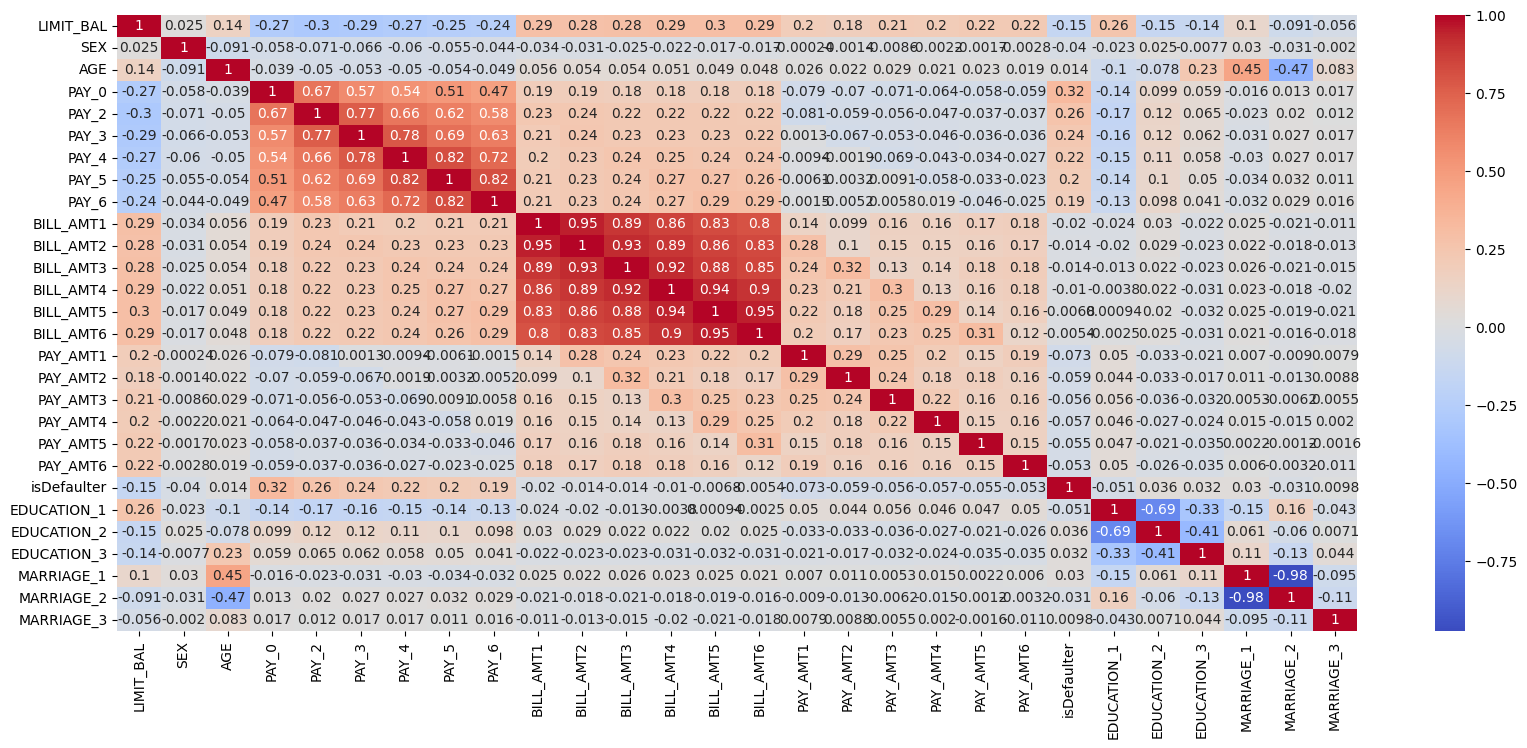

In [142]:
#use correlation to see which features are relate to each other
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='x', ylabel='y'>

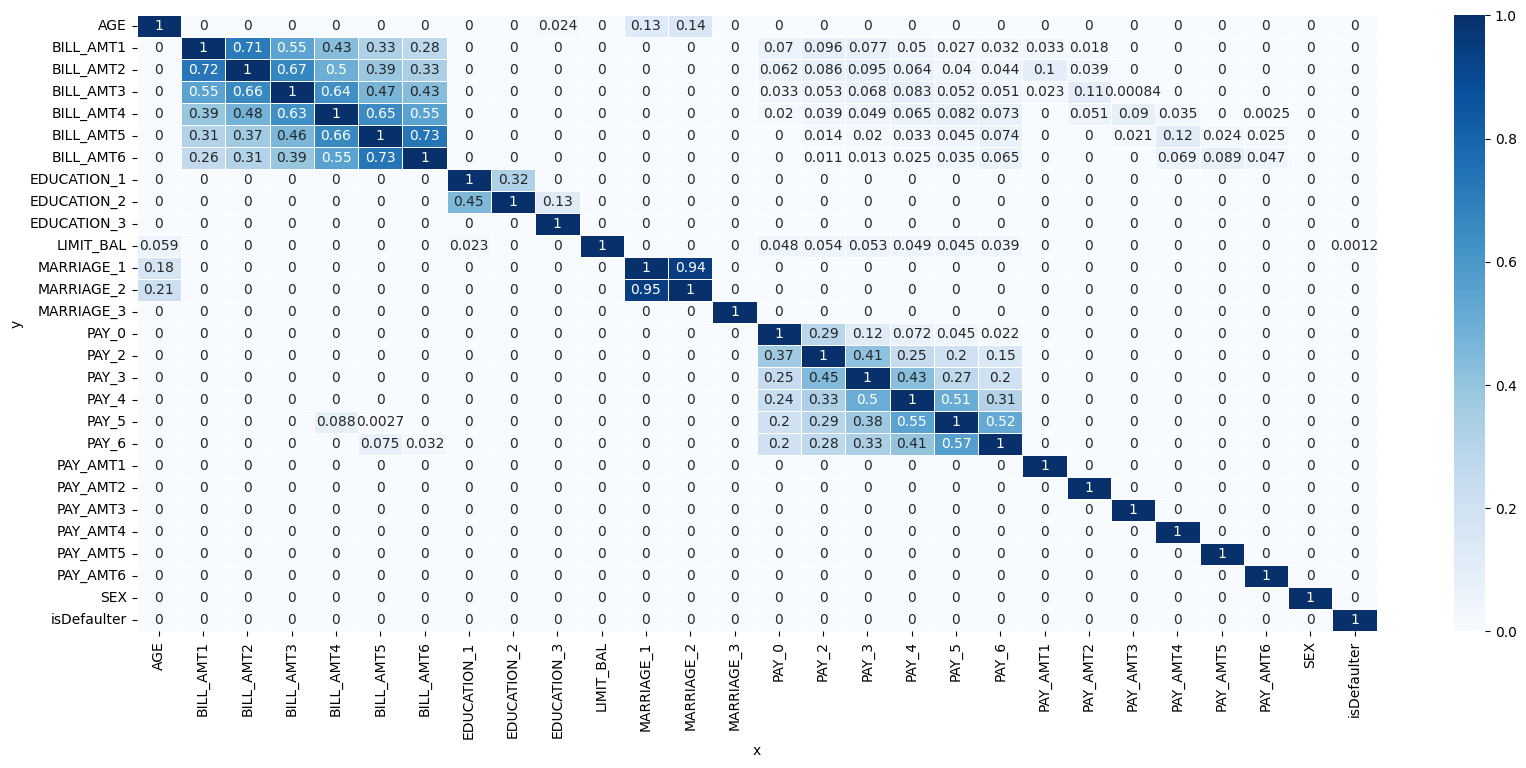

In [143]:
import ppscore as pps

dfcopy = df.copy()
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize = (20,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

### 4. Feature selection  (For now we select all features maybe we can cut this part)

In [144]:
# X = df[        ['LIMIT_BAL', 'SEX', 'EDUCATION_1', 'EDUCATION_2','EDUCATION_3', 'MARRIAGE_1','MARRIAGE_2','MARRIAGE_3', 'AGE', 'PAY_0', 'PAY_2',
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']        ]

X = df[        ['LIMIT_BAL', 'SEX', 'EDUCATION_3','MARRIAGE_1' ,'MARRIAGE_3' ,'PAY_0','BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']        ] 
# Assign selling price as label
y = df["isDefaulter"]

<Axes: >

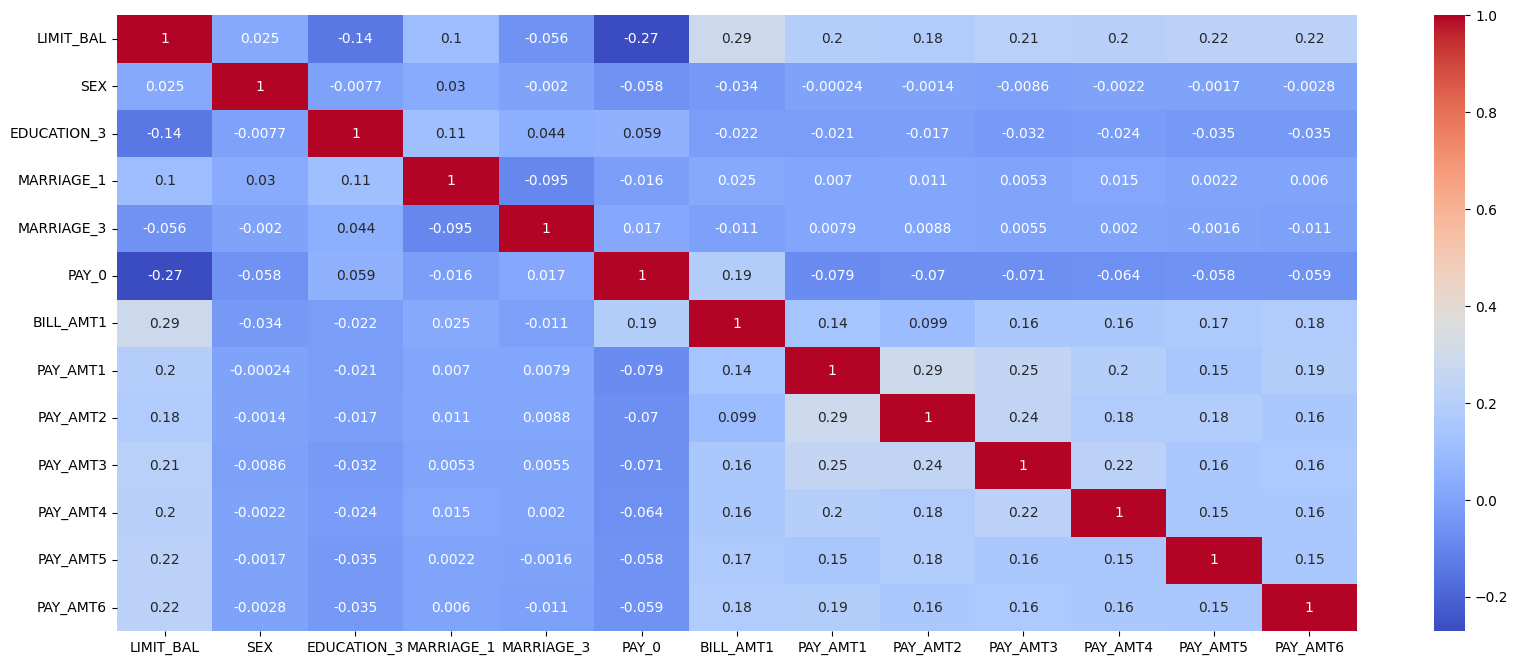

In [145]:
#use correlation to see which features are relate to each other
plt.figure(figsize = (20,8))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")

In [146]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### 5. Preprocessing

In [147]:
from sklearn.preprocessing import StandardScaler

# # Scale only numeric column
# scaled_feature = ['LIMIT_BAL', 'AGE' , 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

scaled_feature = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


scaler = StandardScaler()
X_train[scaled_feature] = scaler.fit_transform(X_train[scaled_feature])
X_test[scaled_feature]  = scaler.transform(X_test[scaled_feature])


In [148]:
X_train

,LIMIT_BAL,SEX,EDUCATION_3,MARRIAGE_1,MARRIAGE_3,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,-0.672359,1,0,0,0,0,0.329670,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240
251,-1.057768,0,0,0,0,0,-0.295445,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532
22941,0.098459,1,0,1,0,0,-0.408879,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107
618,-0.826523,0,0,0,0,0,0.107788,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973
17090,-0.286950,1,0,0,0,0,0.826432,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.903605,0,0,0,0,0,0.021084,-0.214869,-0.121938,-0.201031,-0.294942,-0.235919,3.909990
5390,0.252623,0,0,0,0,2,1.446928,0.458274,0.001602,-0.288246,0.160641,0.075622,-0.066413
860,-0.903605,0,0,0,0,-2,-0.693841,-0.331937,-0.245478,-0.288246,-0.299358,-0.308523,-0.295532
15795,-0.749441,1,0,0,0,0,0.313512,-0.156335,-0.163118,-0.041565,-0.225758,-0.308523,-0.226796


In [149]:
df_new = pd.concat([X_train, y_train], axis =1)

In [150]:
df_new

,LIMIT_BAL,SEX,EDUCATION_3,MARRIAGE_1,MARRIAGE_3,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isDefaulter
21753,-0.672359,1,0,0,0,0,0.329670,-0.126892,-0.039537,-0.173567,-0.224654,-0.216008,-0.245240,0
251,-1.057768,0,0,0,0,0,-0.295445,-0.038915,-0.194250,-0.241596,-0.240785,-0.308523,-0.295532,0
22941,0.098459,1,0,1,0,0,-0.408879,-0.331937,-0.210475,-0.288246,0.122676,0.353487,-0.285107,0
618,-0.826523,0,0,0,0,0,0.107788,-0.213815,-0.167236,-0.178610,-0.207358,-0.186877,-0.180973,0
17090,-0.286950,1,0,0,0,0,0.826432,-0.091947,-0.072522,-0.014157,0.007308,0.011598,0.317359,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,-0.903605,0,0,0,0,0,0.021084,-0.214869,-0.121938,-0.201031,-0.294942,-0.235919,3.909990,0
5390,0.252623,0,0,0,0,2,1.446928,0.458274,0.001602,-0.288246,0.160641,0.075622,-0.066413,1
860,-0.903605,0,0,0,0,-2,-0.693841,-0.331937,-0.245478,-0.288246,-0.299358,-0.308523,-0.295532,0
15795,-0.749441,1,0,0,0,0,0.313512,-0.156335,-0.163118,-0.041565,-0.225758,-0.308523,-0.226796,1


In [151]:
Default = df_new[df_new['isDefaulter']==1]
notDefault = df_new[df_new['isDefaulter']==0]
print("default = ",len(Default))
print("not default = ", len(notDefault))

default =  5323
not default =  18677


In [152]:
from sklearn.utils import resample
notDefault_downsampling = resample(notDefault,
             replace=True,
             n_samples=len(Default),
             random_state=42)
print(len(notDefault_downsampling))

5323


In [153]:
df_downsampled = pd.concat([notDefault_downsampling, Default])
print(len(df_downsampled))

10646


In [154]:
X_train = df_downsampled[        ['LIMIT_BAL', 'SEX', 'EDUCATION_3','MARRIAGE_1' ,'MARRIAGE_3' ,'PAY_0','BILL_AMT1', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']        ] 
# Assign selling price as label
y_train = df_downsampled["isDefaulter"]

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2,stratify=y_train, random_state = 42)

In [156]:
ratio = y_train.value_counts()
print(ratio)

0    4258
1    4258
Name: isDefaulter, dtype: int64


In [157]:
# save the scaler value for using on app
import pickle

pickle.dump(scaler, open('model_with_downsampling/scaler.pkl', 'wb'))

### 6.Train


#### Classification

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
import xgboost as xgb
import joblib
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, auc


Logistic Regression model

In [159]:
# Use Grid Search to find parameter that make best logistic regression model
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [160]:
grid_lr_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [161]:
best_logic_reg = grid_lr_clf.best_estimator_
joblib.dump(best_logic_reg, 'model_with_downsampling/best_logistic_regression_model.pkl')

['model_with_downsampling/best_logistic_regression_model.pkl']

In [162]:
val_class_preds = best_logic_reg.predict(X_val)

In [163]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.6671361502347418


In [164]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.6654275092936803


Gaussian Naive Bayes model

In [165]:
param_grid = {'var_smoothing': [1e-11, 1e-10, 1e-9]}

grid_lr_clf = GridSearchCV(GaussianNB(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-11, 1e-10, 1e-09]},
             scoring='recall')

In [166]:
grid_lr_clf.best_params_

{'var_smoothing': 1e-11}

In [167]:
best_GaussianNB = grid_lr_clf.best_estimator_
joblib.dump(best_GaussianNB, 'model_with_downsampling/best_GaussianNB_model.pkl')

['model_with_downsampling/best_GaussianNB_model.pkl']

In [168]:
val_class_preds = best_GaussianNB.predict(X_val)

In [169]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.5450704225352113


In [170]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.5250521920668059


Random Forest model

In [171]:
param_grid = {'n_estimators': [100,200,300,400], 'max_depth': [10,20,30,40,50]}

grid_lr_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='recall')

In [172]:
grid_lr_clf.best_params_

{'max_depth': 50, 'n_estimators': 300}

In [173]:
best_random_forest = grid_lr_clf.best_estimator_
joblib.dump(best_random_forest,'model_with_downsampling/best_random_forest_model.pkl')

['model_with_downsampling/best_random_forest_model.pkl']

In [174]:
val_class_preds = best_random_forest.predict(X_val)

In [175]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.7328638497652582


In [176]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.7621564482029598


XGBoost Model

In [177]:
param_grid = {'max_depth':[3,5,7,9], 'min_child_weight':[1,3,5]}

grid_lr_clf = GridSearchCV(xgb.XGBClassifier(), param_grid, scoring = 'recall', n_jobs = -1, cv = 5)
grid_lr_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...in=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5]},
             scoring='recall')

In [178]:
grid_lr_clf.best_params_

{'max_depth': 7, 'min_child_weight': 5}

In [179]:
best_xgboost = grid_lr_clf.best_estimator_
joblib.dump(best_xgboost,'model_with_downsampling/best_xgboost_model.pkl')

['model_with_downsampling/best_xgboost_model.pkl']

In [180]:
val_class_preds = best_xgboost.predict(X_val)

In [181]:
val_accuracy = accuracy_score(val_class_preds,y_val)

print("The accuracy on validation data is ", val_accuracy)

The accuracy on validation data is  0.6896713615023474


In [182]:
val_accuracy = recall_score(val_class_preds,y_val)

print("The recall score on validation data is ", val_accuracy)

The recall score on validation data is  0.7028112449799196


| Model | Accuracy on validation | Recall on validation
|:------------------------|:----------:|:---------:|
| Logistic Regression |  0.6671  | 0.6654 |
| Gaussian Naive Bayes |   0.5451 |  0.5251 |
| Random Forest |  0.7343   | 0.7668 |
| XGBoost |   0.6897    |  0.7028 |

From the performance table, we can conclude that random forest with downsampling is our best model

#### Test the best model with test set

0.7163333333333334
0.4078635717669351
0.6557501904036558
0.5029205607476636
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      4687
           1       0.41      0.66      0.50      1313

    accuracy                           0.72      6000
   macro avg       0.65      0.69      0.65      6000
weighted avg       0.78      0.72      0.74      6000



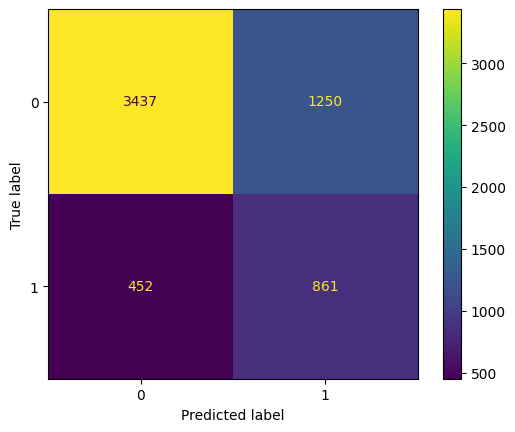

In [183]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import classification_report


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# load a model from MLflow
model = joblib.load('model_with_downsampling/best_random_forest_model.pkl')
ypred = model.predict(X_test)

print(accuracy_score(y_test, ypred))
print(precision_score(y_test, ypred))
print(recall_score(y_test, ypred))
print(f1_score(y_test, ypred))

# print classification report
print(classification_report(y_test, ypred))

#display confusion matrix
cm = confusion_matrix(y_test, ypred)
cmp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])

cmp.plot()




In [200]:
X_test

,LIMIT_BAL,SEX,EDUCATION_3,MARRIAGE_1,MARRIAGE_3,PAY_0,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,-1.057768,0,0,0,0,0,-0.573077,-0.244136,-0.163118,-0.206019,-0.207358,-0.212487,-0.180973
22404,-0.132786,1,0,0,0,0,1.169065,-0.069353,-0.071081,-0.114967,-0.137009,-0.137642,-0.142653
23397,-0.749441,1,1,1,0,0,0.261508,-0.189640,-0.117326,-0.123792,-0.149828,-0.148462,-0.149240
25058,-0.286950,0,1,0,0,0,-0.412122,-0.237697,-0.171025,0.096247,-0.297702,0.140351,-0.043043
2664,-0.903605,1,0,0,0,0,0.589931,-0.214869,-0.183708,-0.233428,-0.188958,-0.308523,-0.238252
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,1.485932,1,0,0,0,1,-0.693841,-0.331937,-0.211299,-0.288246,-0.221404,-0.297063,-0.182691
14144,2.565078,1,0,0,0,2,0.648692,0.019268,0.296080,-0.288246,-0.115358,0.011598,0.277264
23108,-0.826523,1,0,1,0,0,-0.063958,-0.209015,-0.142528,-0.151201,-0.146025,-0.206084,-0.209612
25703,-1.134850,1,0,0,0,1,-0.693841,-0.185953,-0.082117,-0.213145,-0.262558,-0.308523,-0.295532


In [197]:
X_test.iloc[0]

LIMIT_BAL     -1.057768
SEX            0.000000
EDUCATION_3    0.000000
MARRIAGE_1     0.000000
MARRIAGE_3     0.000000
PAY_0          0.000000
BILL_AMT1     -0.573077
PAY_AMT1      -0.244136
PAY_AMT2      -0.163118
PAY_AMT3      -0.206019
PAY_AMT4      -0.207358
PAY_AMT5      -0.212487
PAY_AMT6      -0.180973
Name: 2308, dtype: float64

In [201]:
data = {
    'LIMIT_BAL': -1.057768,
    'SEX': 0.000000,
    'EDUCATION_3': 0.000000,
    'MARRIAGE_1': 0.000000,
    'MARRIAGE_3': 0.000000,
    'PAY_0': 0.000000,
    'BILL_AMT1': -0.573077,
    'PAY_AMT1': -0.244136,
    'PAY_AMT2': -0.163118,
    'PAY_AMT3': -0.206019,
    'PAY_AMT4': -0.207358,
    'PAY_AMT5': -0.212487,
    'PAY_AMT6': -0.180973
}
X_single_data = pd.DataFrame(data, index=[0])

# Predict using the single data point
ypred_single_data = model.predict(X_single_data)

print("Prediction:", ypred_single_data)

Prediction: [1]


In [184]:
preds = model.predict_proba(X_test)[2,:]
preds


array([0.59666667, 0.40333333])

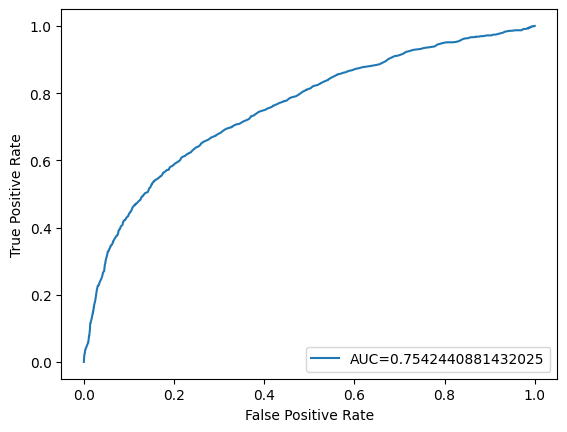

In [185]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr,  thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()